<a href="https://colab.research.google.com/github/saffarizadeh/BUAN4061/blob/main/Image_Classifier_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="http://saffarizadeh.com/Logo.png" width="300px"/>

# *BUAN 4061: Advanced Business Analytics*

# **Image Classifier Example**

Instructor: Dr. Kambiz Saffarizadeh

---

Source: https://tfhub.dev/google/tf2-preview/inception_v3/classification/4

In [71]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow_hub as hub

# Model

We can grab a pretrained model from https://tfhub.dev/.

In [72]:
inception_model_1 = hub.KerasLayer("https://tfhub.dev/google/tf2-preview/inception_v3/classification/4", output_shape=[1001])

This model is ready to use. But you could technically use it as a layer in another model as well.

In [73]:
inception_model_2 = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/inception_v3/classification/4", trainable=False, output_shape=[1001])
])
inception_model_2.build([None, 299, 299, 3])  # Batch input shape.

In [74]:
inception_model_2.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_16 (KerasLayer)  (None, 1001)             23853833  
                                                                 
Total params: 23,853,833
Trainable params: 0
Non-trainable params: 23,853,833
_________________________________________________________________


# Data

In [ ]:
!wget https://arc-anglerfish-washpost-prod-washpost.s3.amazonaws.com/public/2KL6JYQYH4I6REYMIWBYVUGXPI.jpg

There are many ways to load the image and prepare it to be fed into our model.

In [77]:
image_d = tf.keras.preprocessing.image.load_img('2KL6JYQYH4I6REYMIWBYVUGXPI.jpg', target_size=(299, 299))
image_array = tf.keras.preprocessing.image.img_to_array(image_d) / 255.0

In [78]:
image_array.shape

(299, 299, 3)

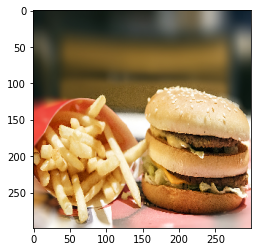

In [79]:
plt.imshow(image_array)

Before we run the model and classify this image, let's download the real class labels used in the model so that we can make sense of its outputs.

In [81]:
labels = pd.read_csv('https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt', sep='\n', header=None)
labels

,0
0,background
1,tench
2,goldfish
3,great white shark
4,tiger shark
...,...
996,earthstar
997,hen-of-the-woods
998,bolete
999,ear


# Using the classifier

`image_array` is a (299, 299, 3) shaped array. However, image classifier models typically require an extra axis or dimension because they typically receive multiple images as inputs not just one. Therefore, we have to convert the array to a (1, 299, 299, 3) array.

In [82]:
image_array = image_array[tf.newaxis, ...]

In [83]:
output = inception_model_1(image_array)

In [84]:
np.argsort(-1*output)[0] # Sorting the output from highest to lowest

array([934, 932, 949, ...,   2, 120, 903])

In [85]:
labels.iloc[np.argsort(-1*output)[0]]

,0
934,cheeseburger
932,bagel
949,Granny Smith
935,hotdog
944,cucumber
...,...
685,ocarina
755,radio
2,goldfish
120,rock crab
